In [31]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [32]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [33]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [34]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [35]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [36]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [37]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [38]:
# Create our session (link) from Python to the DB
session = Session(engine)
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis

In [39]:
# Find the most recent date in the data set.
recent_date=session.query(func.max(Measurement.date)).all()
recent_date

[('2017-08-23',)]

In [40]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
engine.execute("select * from Measurement limit 10").fetchall()
session.query(func.count(Measurement.date)).all()










[(19550,)]

In [41]:
# Perform a query to retrieve the data and precipitation scores
preci_score= session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").\
        filter(Measurement.date <= "2017-08-23").\
        group_by(Measurement.date).all()
preci_score


[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [42]:
# Calculate the date one year from the last date in data set



In [45]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# df=pd.DataFrame(preci_score,columns=['date','prcp'])
# df.set_index('date',inplace=True)
# df1=df.sort_values(by='date').dropna()
# df1.head()


df = pd.DataFrame(preci_score, columns=['date','prcp'])

df.sort_values(by='date',ascending= True) 
df.rename(columns={0:"Date",1:"Precipitation"},inplace =True)
df.set_index('date')
df.head

<bound method NDFrame.head of            date  prcp
0    2016-08-23  0.00
1    2016-08-24  0.08
2    2016-08-25  0.08
3    2016-08-26  0.00
4    2016-08-27  0.00
..          ...   ...
361  2017-08-19  0.00
362  2017-08-20  0.00
363  2017-08-21  0.00
364  2017-08-22  0.00
365  2017-08-23  0.00

[366 rows x 2 columns]>

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Inches')]

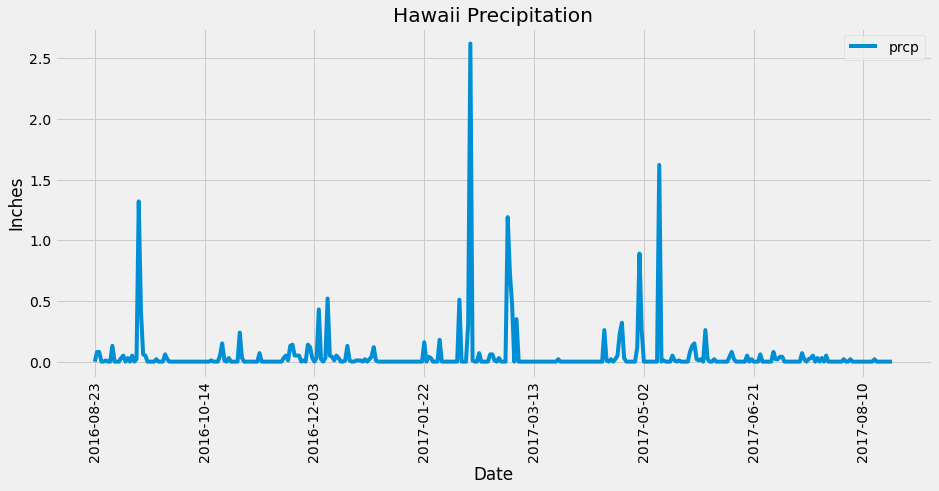

In [46]:

df1.plot(title='Hawaii Precipitation', rot=90,
         figsize=(14,6)).set(xlabel='Date', ylabel='Inches')

In [54]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df1.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [48]:
# Design a query to calculate the total number stations in the dataset
total_stations=session.query(func.count(Station.station)).all()
total_stations

[(9,)]

In [49]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
sel = [Measurement.station, func.count(Measurement.station)]
sel
count = (session.query(*sel).group_by(Measurement.station)).order_by(func.count(Measurement.station).desc()).all()
count


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [50]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active=count[0][0]
most_active


'USC00519281'

In [51]:
# Using the most active station id
lowest_temp = session.query(func.min(Measurement.tobs)               
                      .filter(Measurement.station == most_active)
                      ).all()

lowest_temp

[(54.0,)]

In [52]:
highest_temp = session.query(func.max(Measurement.tobs)               
                      .filter(Measurement.station == most_active)
                      ).all()

highest_temp

[(85.0,)]

In [53]:

average_temp=session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active).all()                      

average_temp

[(71.66378066378067,)]

In [56]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

active_stations_val =most_active[0] 
active_stations_val

active_stations_temps= session.query(Measurement.tobs).\
                        filter(Measurement.date >= "2016-08-23").\
                       filter(Measurement.station == "USC00519281").all()
active_stations_temps
len(active_stations_temps)

all_temps= [z[0] for z in active_stations_temps]
all_temps

[77.0,
 77.0,
 80.0,
 80.0,
 75.0,
 73.0,
 78.0,
 77.0,
 78.0,
 80.0,
 80.0,
 78.0,
 78.0,
 78.0,
 73.0,
 74.0,
 80.0,
 79.0,
 77.0,
 80.0,
 76.0,
 79.0,
 75.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 76.0,
 74.0,
 77.0,
 78.0,
 79.0,
 79.0,
 77.0,
 80.0,
 78.0,
 78.0,
 78.0,
 77.0,
 79.0,
 79.0,
 79.0,
 79.0,
 75.0,
 76.0,
 73.0,
 72.0,
 71.0,
 77.0,
 79.0,
 78.0,
 79.0,
 77.0,
 79.0,
 77.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 74.0,
 75.0,
 76.0,
 73.0,
 76.0,
 74.0,
 77.0,
 76.0,
 76.0,
 74.0,
 75.0,
 75.0,
 75.0,
 75.0,
 71.0,
 63.0,
 70.0,
 68.0,
 67.0,
 77.0,
 74.0,
 77.0,
 76.0,
 76.0,
 75.0,
 76.0,
 75.0,
 73.0,
 75.0,
 73.0,
 75.0,
 74.0,
 75.0,
 74.0,
 75.0,
 73.0,
 75.0,
 73.0,
 73.0,
 74.0,
 70.0,
 72.0,
 70.0,
 67.0,
 67.0,
 69.0,
 70.0,
 68.0,
 69.0,
 69.0,
 66.0,
 65.0,
 68.0,
 62.0,
 75.0,
 70.0,
 69.0,
 76.0,
 76.0,
 74.0,
 73.0,
 71.0,
 74.0,
 74.0,
 72.0,
 71.0,
 72.0,
 74.0,
 69.0,
 67.0,
 72.0,
 70.0,
 64.0,
 63.0,
 63.0,
 62.0,
 70.0,
 70.0,
 62.0,
 62.0,
 63.0,
 65.0,

Text(0.5, 0, 'Temperature')

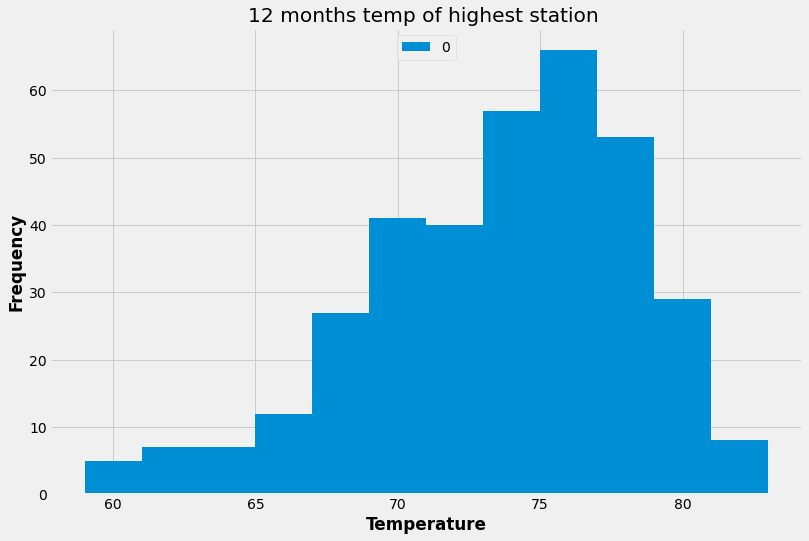

In [58]:
tobs_df=pd.DataFrame(all_temps)
tobs_df
#tobs_df.hist(column='tobs', bins=12, figsize=(12,8).legend(
 #   loc='upper center', ncol=3, title="tobs"))
tobs_df.plot(kind="hist",title="12 months temp of highest station ",bins=12,figsize=(12,8)).legend(
    loc='upper center')
plt.ylabel('Frequency', weight='bold')
plt.xlabel('Temperature', weight='bold')



# Close session

In [102]:
# Close Session
session.close()